In [121]:
from splinter import Browser
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from datetime import datetime

In [122]:
# Setup splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [123]:
# The url to scrape
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)
html = browser.html
soup = bs(html, "html.parser")
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<meta content="Mark Otto, Jacob Thornton, and Bootstrap contributors" name="author"/>
<meta content="Hugo 0.84.0" name="generator"/>
<title>Mars Temperature Data</title>
<link href="https://getbootstrap.com/docs/5.0/examples/jumbotron/" rel="canonical"/>
<!-- Bootstrap core CSS -->
<link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" rel="stylesheet"/>
<style>
    .bd-placeholder-img {
      font-size: 1.125rem;
      text-anchor: middle;
      -webkit-user-select: none;
      -moz-user-select: none;
      user-select: none;
    }

    @media (min-width: 768px) {
      .bd-placeholder-img-lg {
        font-size: 3.5rem;
      }
    }
  </style>
</head>
<body>
<main>
<div class="container py-4">


In [124]:
table = soup.select('table.table')
table

[<table class="table">
 <tbody><tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td

In [125]:
rows = soup.find_all('tr', class_="data-row")

In [126]:

list_of_rows = []

for row in rows:
    td = row.find_all('td')
    row = [col.text for col in td]
    list_of_rows.append(row)
list_of_rows

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [127]:
# Quit the browser
browser.quit()

In [128]:
# Data into a dataframe
MarsData_df = pd.DataFrame(list_of_rows, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])
MarsData_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [129]:
#Check the data types in the table
MarsData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [130]:
MarsData_df["terrestrial_date"] = pd.to_datetime(MarsData_df["terrestrial_date"], infer_datetime_format=True)

In [131]:
# Convert the data type
MarsData_df = MarsData_df.astype(
    {"id":'int',
    "sol": 'int',
    "ls": 'int',
    "month": 'int',
    "min_temp": 'float',
    "pressure": 'float'
    }
)

In [132]:
#Check new data types
MarsData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


In [133]:
#How many months exist on Mars?
month = MarsData_df["month"].unique()
month

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5])

In [134]:
#How many Martian (and not Earth) days' worth of data exist in the scraped dataset?
MarsData_df.sort_values("sol", ascending=True)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [135]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
tempmin_df = MarsData_df.groupby("month", as_index=False)["min_temp"].mean() 
tempmin_df

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


In [136]:
#coldest and wamerst months
tempmin_df.sort_values("min_temp", ascending=True)

,month,min_temp
2,3,-83.307292
3,4,-82.747423
1,2,-79.932584
4,5,-79.308725
0,1,-77.160920
5,6,-75.299320
11,12,-74.451807
6,7,-72.281690
10,11,-71.985507
9,10,-71.982143


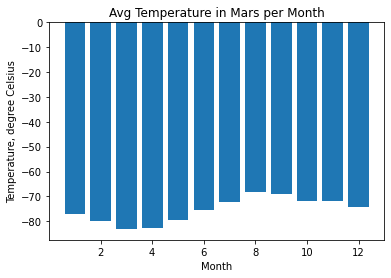

In [137]:
x = tempmin_df["month"]
y = tempmin_df["min_temp"]
plt.bar(x,y)
plt.title("Avg Temperature in Mars per Month")
plt.xlabel("Month")
plt.ylabel("Temperature, degree Celsius")
plt.show()

In [138]:
#Which months have the lowest and the highest atmospheric pressure on Mars? 
pressure_df = MarsData_df.groupby("month", as_index=False)["pressure"].mean() 
pressure_df

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


In [139]:
pressure_df.sort_values("pressure", ascending=True)

,month,pressure
5,6,745.054422
4,5,748.557047
6,7,795.105634
3,4,806.329897
11,12,842.156627
10,11,857.014493
0,1,862.488506
7,8,873.829787
2,3,877.322917
9,10,887.312500


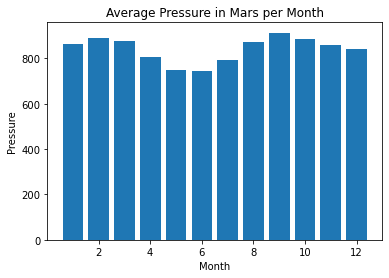

In [140]:
x = pressure_df["month"]
y = pressure_df["pressure"]
plt.bar(x,y)
plt.title("Average Pressure in Mars per Month")
plt.xlabel("Month")
plt.ylabel("Pressure")
plt.show()

In [141]:

find_first_1 = False
find_first_2 = False
find_second_1 = False

In [142]:
#calculate the days
for row in MarsData_df.index:
    if find_first_1 == False:

        if MarsData_df.loc[row, "month"] == 1:
            start_date = MarsData_df.loc[row, "terrestrial_date"]
            find_first_1 = True
            start_date_index = row

    elif (find_first_1 == True) & (find_first_2 == False):
        
        if MarsData_df.loc[row, "month"] == 2:
            find_first_2 = True

    elif find_second_1 == False:
        
        if MarsData_df.loc[row, "month"] == 1:
            end_date = MarsData_df.loc[(row-1), "terrestrial_date"]
            find_second_1 = True
            end_date_index = row-1

In [143]:
#how  many days....
total_days = (end_date - start_date).days
total_days

686

In [144]:
#About how many terrestrial (Earth) days exist in a Martian year? 
print(f"There is approximately {total_days} terrestrial (Earth) days that exist in a Martian year")

There is approximately 686 terrestrial (Earth) days that exist in a Martian year


In [145]:
DailyMinTemp_df = MarsData_df[start_date_index: end_date_index][["terrestrial_date","min_temp"]].set_index("terrestrial_date")

DailyMinTemp_df.index = DailyMinTemp_df.index.astype(str)

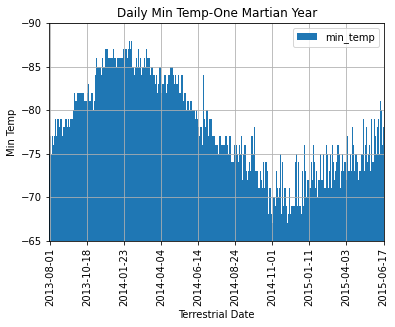

In [146]:
DailyMinTemp_df.plot(y="min_temp", kind="bar", rot=90, fontsize=10, grid=True, width=2)

tick_locations = np.arange(0, len(DailyMinTemp_df), 68.8)

x_ticks = DailyMinTemp_df.iloc[tick_locations,:0]

plt.xticks(tick_locations, x_ticks.index.values)

plt.ylim(-65, -90)

plt.ylabel("Min Temp")
plt.xlabel("Terrestrial Date")

plt.title("Daily Min Temp-One Martian Year")

plt.show()

In [147]:
#Export the DataFrame to a CSV file.
MarsData_df.to_csv("Mars_info.csv")